<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/lal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [50]:
# The function is defined with default parameters so that if you call it with just your data, it will construct a DataFrame with t-1 
# as X and t as y

def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

In [54]:
df = pd.read_csv("/content/adj.csv")
df

,month,spi1,sl1,avg temp,avg wind,avg solar,avg R.HUM
0,01-06-1980,0.364798,-1.469306,25.425283,2.189559,19.364782,0.856281
1,01-07-1980,0.606144,0.364798,22.978145,1.954671,14.713567,0.942733
2,01-08-1980,0.606144,0.606144,23.261097,1.825505,18.302932,0.903878
3,01-09-1980,1.001410,0.606144,24.600967,1.422751,21.047197,0.882303
4,01-10-1980,2.145778,1.001410,24.909726,1.340778,20.217253,0.833859
...,...,...,...,...,...,...,...
403,01-01-2014,0.317544,0.143235,30.152161,1.139606,21.956720,0.654759
404,01-02-2014,0.546507,0.317544,29.996125,1.150569,22.686995,0.682444
405,01-03-2014,0.629004,0.546507,27.362823,1.243372,21.104676,0.783198
406,01-04-2014,0.174373,0.629004,23.614450,1.168167,12.783414,0.946414


IndexError: ignored

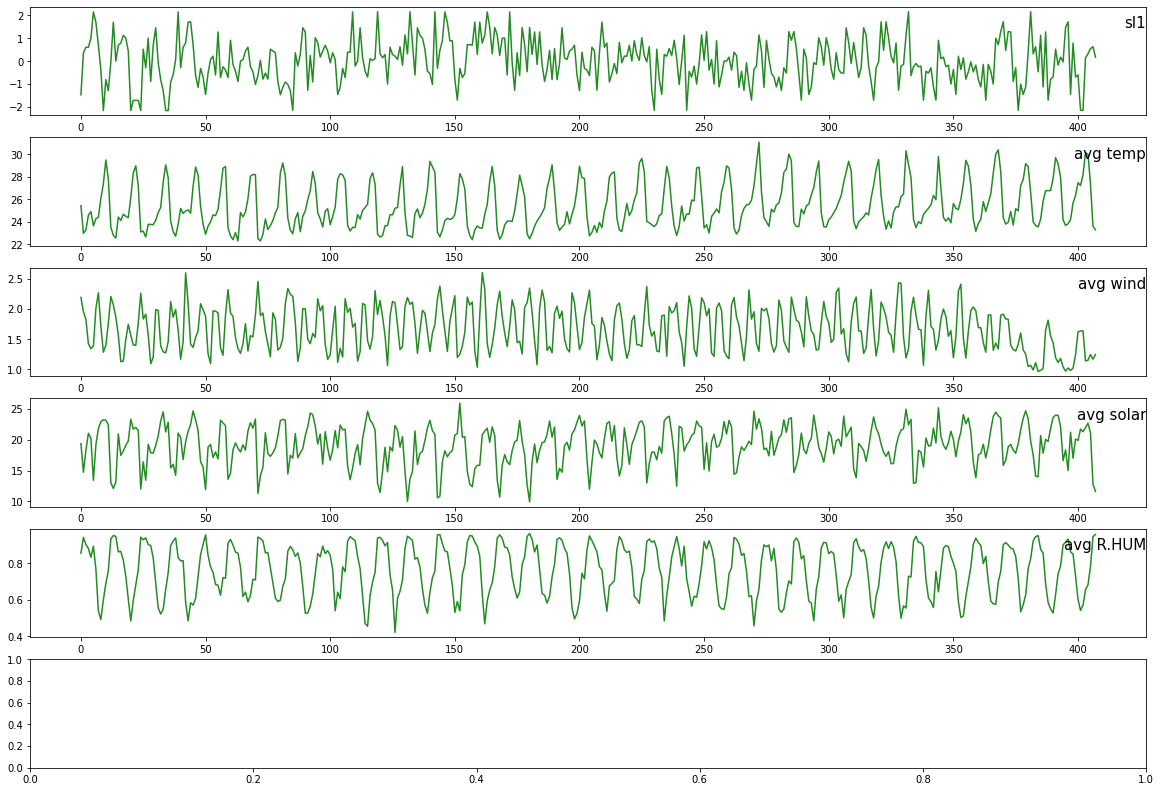

In [200]:
values = df.values

# specify columns to plot
groups = [1, 2, 3, 4,5,6]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(df.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

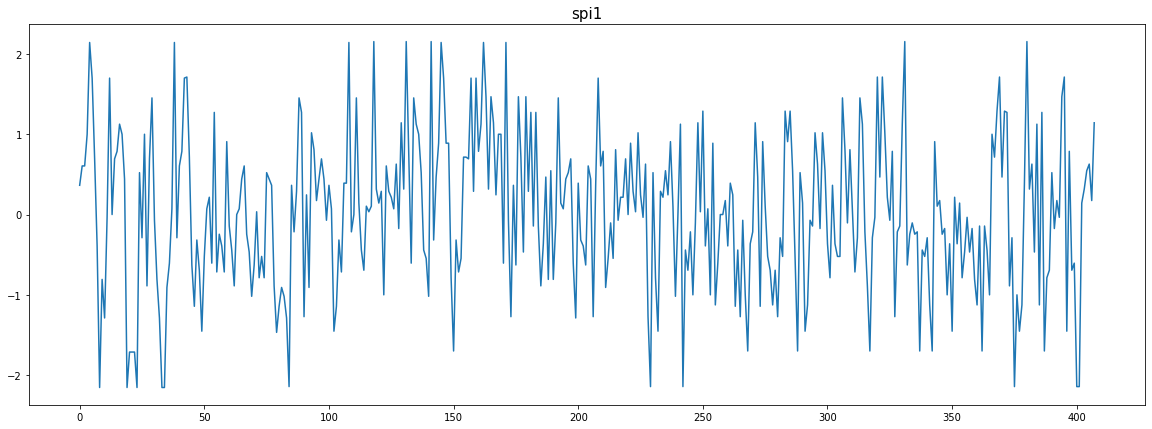

In [58]:
fig = plt.figure(figsize = (20,7))
plt.plot(df.spi1)
plt.title("spi1", fontsize = 15)
plt.show()

In [59]:
del df["month"]

In [126]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [160]:
# Scaling the entire dataset

dataset = df
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled.shape)

(408, 6)


In [161]:
# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1,1 )
print(reframed.shape)

(407, 12)


In [162]:
print(reframed.head())

# Here, there are some unwanted data, which we don't want to predict, i.e here var2(t), var3(3), ....

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.584563   0.159405   0.356646   0.749359   0.590056   0.801607  0.640508   
2   0.640508   0.584563   0.078166   0.605600   0.299907   0.960588  0.640508   
3   0.640508   0.640508   0.110365   0.526547   0.523816   0.889136  0.732133   
4   0.732133   0.640508   0.262840   0.280049   0.695007   0.849461  0.997405   
5   0.997405   0.732133   0.297976   0.229879   0.643234   0.760374  0.894432   

    var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  
1  0.584563  0.078166  0.605600  0.299907  0.960588  
2  0.640508  0.110365  0.526547  0.523816  0.889136  
3  0.640508  0.262840  0.280049  0.695007  0.849461  
4  0.732133  0.297976  0.229879  0.643234  0.760374  
5  0.997405  0.153622  0.257915  0.218193  0.872728  


In [163]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)',
       'var6(t)'],
      dtype='object')

In [164]:
# droping columns we don't want to predict

reframed.drop(reframed.columns[[0,1,2,3,4,5]], axis=1, inplace=True)
print(reframed.head())

    var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)
1  0.640508  0.584563  0.078166  0.605600  0.299907  0.960588
2  0.640508  0.640508  0.110365  0.526547  0.523816  0.889136
3  0.732133  0.640508  0.262840  0.280049  0.695007  0.849461
4  0.997405  0.732133  0.297976  0.229879  0.643234  0.760374
5  0.894432  0.997405  0.153622  0.257915  0.218193  0.872728


In [225]:
values = reframed.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 307

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(307, 1, 5) (307,) (100, 1, 5) (100,)


In [227]:
train.shape, test.shape, values.shape

((307, 6), (100, 6), (407, 6))

In [228]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization,GRU
from tensorflow.keras.models import Sequential

In [229]:
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.30))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=70, batch_size=30, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/70
9/9 - 3s - loss: 0.4005 - val_loss: 0.2949 - 3s/epoch - 336ms/step
Epoch 2/70
9/9 - 0s - loss: 0.2946 - val_loss: 0.2097 - 75ms/epoch - 8ms/step
Epoch 3/70
9/9 - 0s - loss: 0.2114 - val_loss: 0.1471 - 71ms/epoch - 8ms/step
Epoch 4/70
9/9 - 0s - loss: 0.1454 - val_loss: 0.1078 - 80ms/epoch - 9ms/step
Epoch 5/70
9/9 - 0s - loss: 0.1110 - val_loss: 0.0901 - 58ms/epoch - 6ms/step
Epoch 6/70
9/9 - 0s - loss: 0.0949 - val_loss: 0.0862 - 77ms/epoch - 9ms/step
Epoch 7/70
9/9 - 0s - loss: 0.0855 - val_loss: 0.0864 - 62ms/epoch - 7ms/step
Epoch 8/70
9/9 - 0s - loss: 0.0871 - val_loss: 0.0850 - 73ms/epoch - 8ms/step
Epoch 9/70
9/9 - 0s - loss: 0.0797 - val_loss: 0.0824 - 54ms/epoch - 6ms/step
Epoch 10/70
9/9 - 0s - loss: 0.0811 - val_loss: 0.0796 - 54ms/epoch - 6ms/step
Epoch 11/70
9/9 - 0s - loss: 0.0767 - val_loss: 0.0773 - 70ms/epoch - 8ms/step
Epoch 12/70
9/9 - 0s - loss: 0.0752 - val_loss: 0.0753 - 57ms/epoch - 6ms/step
Epoch 13/70
9/9 - 0s - loss: 0.0719 - val_loss: 0.0735 - 62ms

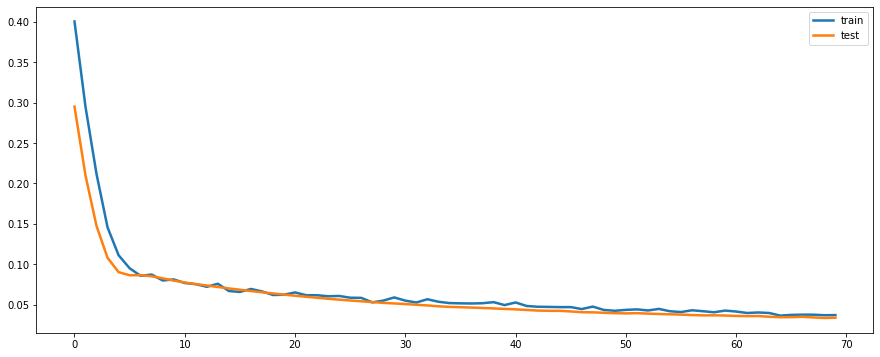

In [230]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [169]:
test_X.shape

(107, 1, 5)

In [231]:
testPredict = model.predict(test_X)
print(testPredict.shape)
testPredict = testPredict.ravel()

print(testPredict.shape)

(100, 1)
(100,)


In [ ]:
test.shape

(286, 5)

In [ ]:
print(test), print(test.shape)

In [232]:
y_test_true = test[:,5]

In [ ]:
testPredict.shape

(122,)

In [235]:
poll = np.array(df['spi1'])
print(poll.shape)
meanop = poll.mean()
stdop = poll.std()
print(testPredict.shape)
y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

testPredict.shape

(408,)
(100,)


(100,)

(408,)
(100,)


(100,)

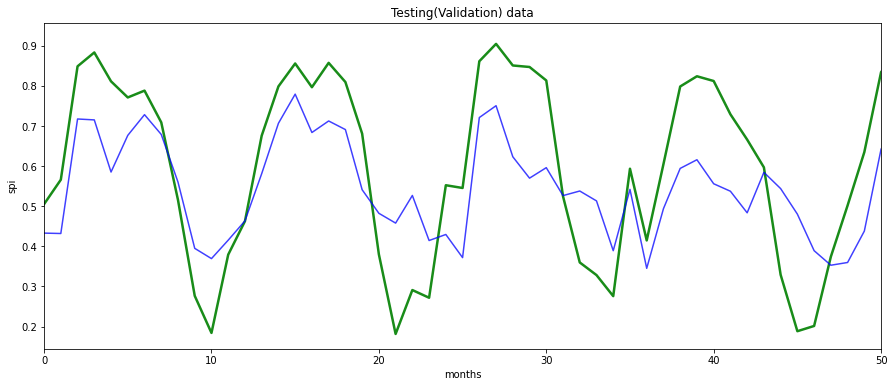

(100,)


In [236]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([0,50])
plt.ylabel("spi")
plt.xlabel("months")

plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()
#testPredict=testPredict.reshape(-1,1)
print(testPredict.shape)
#testTrue = scaler.inverse_transform(testPredict)

In [237]:
from sklearn.metrics import r2_score
r=r2_score(y_test_true, testPredict)
print("r2socre ="  ,r)
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

# As we see the,  RMSE for testing data is low, and visually as well, from the above plots, we can see that the basic model is able to
# predict the future values of pollution (in ppm) pretty well

r2socre = 0.5723737183860691
Test(Validation) RMSE = 0.14756651
